In [3]:
import pandas as pd 
import yfinance as yf

In [4]:
nifty = yf.Ticker("^NSEI")

In [5]:
nifty = nifty.history(period="max")

In [6]:
nifty.head(10)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2007-09-17 00:00:00+05:30,4518.450195,4549.049805,4482.850098,4494.649902,0,0.0,0.0
2007-09-18 00:00:00+05:30,4494.100098,4551.799805,4481.549805,4546.200195,0,0.0,0.0
2007-09-19 00:00:00+05:30,4550.250000,4739.000000,4550.250000,4732.350098,0,0.0,0.0
2007-09-20 00:00:00+05:30,4734.850098,4760.850098,4721.149902,4747.549805,0,0.0,0.0
2007-09-21 00:00:00+05:30,4752.950195,4855.700195,4733.700195,4837.549805,0,0.0,0.0
2007-09-24 00:00:00+05:30,4837.149902,4941.149902,4837.149902,4932.200195,0,0.0,0.0
2007-09-25 00:00:00+05:30,4939.100098,4953.899902,4878.149902,4938.850098,0,0.0,0.0
2007-09-26 00:00:00+05:30,4937.600098,4980.850098,4930.350098,4940.500000,0,0.0,0.0
2007-09-27 00:00:00+05:30,4942.700195,5016.399902,4942.700195,5000.549805,0,0.0,0.0


In [2]:
nifty.shape

NameError: name 'nifty' is not defined

In [17]:
nifty.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4048 entries, 2007-09-17 00:00:00+05:30 to 2024-03-21 00:00:00+05:30
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          4048 non-null   float64
 1   High          4048 non-null   float64
 2   Low           4048 non-null   float64
 3   Close         4048 non-null   float64
 4   Volume        4048 non-null   int64  
 5   Dividends     4048 non-null   float64
 6   Stock Splits  4048 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 253.0 KB


In [36]:
nifty.describe()

0

In [7]:
#export nifty as dataset 
nifty.to_csv("NIFTY50.csv")

In [19]:
import matplotlib.pyplot as plt


<AxesSubplot:xlabel='Date'>

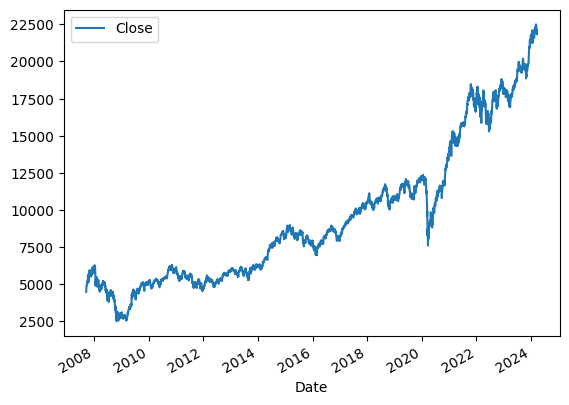

In [25]:
nifty.plot.line(y="Close",use_index=True)

In [26]:
del nifty['Stock Splits']
del nifty['Dividends']

In [27]:
nifty.head()

,Open,High,Low,Close,Volume
Date,,,,,
2007-09-17 00:00:00+05:30,4518.450195,4549.049805,4482.850098,4494.649902,0
2007-09-18 00:00:00+05:30,4494.100098,4551.799805,4481.549805,4546.200195,0
2007-09-19 00:00:00+05:30,4550.250000,4739.000000,4550.250000,4732.350098,0
2007-09-20 00:00:00+05:30,4734.850098,4760.850098,4721.149902,4747.549805,0
2007-09-21 00:00:00+05:30,4752.950195,4855.700195,4733.700195,4837.549805,0


In [28]:
nifty["Tomorrow"] = nifty["Close"].shift(-1)

In [40]:
nifty.head()

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
2007-09-17 00:00:00+05:30,4518.450195,4549.049805,4482.850098,4494.649902,0,4546.200195,1
2007-09-18 00:00:00+05:30,4494.100098,4551.799805,4481.549805,4546.200195,0,4732.350098,1
2007-09-19 00:00:00+05:30,4550.250000,4739.000000,4550.250000,4732.350098,0,4747.549805,1
2007-09-20 00:00:00+05:30,4734.850098,4760.850098,4721.149902,4747.549805,0,4837.549805,1
2007-09-21 00:00:00+05:30,4752.950195,4855.700195,4733.700195,4837.549805,0,4932.200195,1


In [37]:
nifty["Target"] = (nifty["Tomorrow"]>nifty["Close"]).astype(int)

In [44]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100,min_samples_split=100,random_state=1)

train = nifty.iloc[:-100]
test = nifty.iloc[-100:]

predictors = ["Close","Open","High","Low","Volume"]
model.fit(train[predictors],train["Target"])

RandomForestClassifier(min_samples_split=100, random_state=1)

In [45]:
from sklearn.metrics import precision_score
pred = model.predict(test[predictors])

In [49]:
test[predictors]

,Close,Open,High,Low,Volume
Date,,,,,
2023-10-26 00:00:00+05:30,18857.250000,19027.250000,19041.699219,18837.849609,300400
2023-10-27 00:00:00+05:30,19047.250000,18928.750000,19076.150391,18926.650391,205200
2023-10-30 00:00:00+05:30,19140.900391,19053.400391,19158.500000,18940.000000,180100
2023-10-31 00:00:00+05:30,19079.599609,19232.949219,19233.699219,19056.449219,206000
2023-11-01 00:00:00+05:30,18989.150391,19064.050781,19096.050781,18973.699219,194100
...,...,...,...,...,...
2024-03-15 00:00:00+05:30,22023.349609,22064.849609,22120.900391,21931.699219,661500
2024-03-18 00:00:00+05:30,22055.699219,21990.099609,22123.699219,21916.550781,356300
2024-03-19 00:00:00+05:30,21817.449219,21946.449219,21978.300781,21793.099609,344200


In [73]:
#test1["Close","Open","High","Low","Volume"] = [22055.699219,19232.949219,19233.699219,18926.650391,661500]
test1 = {
    "Close":[22055.699219],"Open":[19232.949219],"High":[19233.699219],"Low":[18926.650391],"Volume":[661500]
}
test1= pd.DataFrame(test1)

In [74]:
pred1 = model.predict(test1[predictors])
pred1

array([1])

In [48]:
pred = pd.Series(pred,index=test.index)
pred

Date
2023-10-26 00:00:00+05:30    1
2023-10-27 00:00:00+05:30    1
2023-10-30 00:00:00+05:30    1
2023-10-31 00:00:00+05:30    1
2023-11-01 00:00:00+05:30    1
                            ..
2024-03-15 00:00:00+05:30    0
2024-03-18 00:00:00+05:30    0
2024-03-19 00:00:00+05:30    0
2024-03-20 00:00:00+05:30    0
2024-03-21 00:00:00+05:30    0
Length: 100, dtype: int32

In [46]:
precision_score(test["Target"],pred)

0.6875